<a href="https://colab.research.google.com/github/yashmith-r/Facebook-Marketplace-Case-Project/blob/main/Fakebook_Marketplace_Case_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Facebook_Marketplace_data.csv")
print(df.head(5))

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  Column1  Column2  Column3  Column4  
0           0      NaN      NaN      NaN      NaN  
1           0      NaN      Na

In [71]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

We can see that Status_type, status_punlished is a categoricaln data.

In [72]:
print(df.describe())

         status_id  num_reactions  num_comments   num_shares    num_likes  \
count  7050.000000    7050.000000   7050.000000  7050.000000  7050.000000   
mean   3525.500000     230.117163    224.356028    40.022553   215.043121   
std    2035.304031     462.625309    889.636820   131.599965   449.472357   
min       1.000000       0.000000      0.000000     0.000000     0.000000   
25%    1763.250000      17.000000      0.000000     0.000000    17.000000   
50%    3525.500000      59.500000      4.000000     0.000000    58.000000   
75%    5287.750000     219.000000     23.000000     4.000000   184.750000   
max    7050.000000    4710.000000  20990.000000  3424.000000  4710.000000   

         num_loves     num_wows    num_hahas     num_sads   num_angrys  \
count  7050.000000  7050.000000  7050.000000  7050.000000  7050.000000   
mean     12.728652     1.289362     0.696454     0.243688     0.113191   
std      39.972930     8.719650     3.957183     1.597156     0.726812   
min       

Handling Missing Values

In [73]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [74]:
df = df.drop(columns = ['Column1','Column2','Column3','Column4'])
print(df.columns)

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')


Handling Categorical Data.

In [75]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB
None


In [105]:
print(df['status_published'].describe())

count                             7050
mean     2016-11-20 05:13:52.672340224
min                2012-07-15 02:51:00
25%                2016-03-15 16:52:45
50%                2017-11-18 01:19:00
75%                2018-03-09 05:26:45
max                2018-06-13 01:12:00
Name: status_published, dtype: object


In [77]:
print(df['status_published'].head())

0     4/22/2018 6:00
1    4/21/2018 22:45
2     4/21/2018 6:17
3     4/21/2018 2:29
4     4/18/2018 3:22
Name: status_published, dtype: object


In [78]:
df['status_published'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')
print(df['status_published'].head())

0   2018-04-22 06:00:00
1   2018-04-21 22:45:00
2   2018-04-21 06:17:00
3   2018-04-21 02:29:00
4   2018-04-18 03:22:00
Name: status_published, dtype: datetime64[ns]


In [79]:
print(df.head())

   status_id status_type    status_published  num_reactions  num_comments  \
0          1       video 2018-04-22 06:00:00            529           512   
1          2       photo 2018-04-21 22:45:00            150             0   
2          3       video 2018-04-21 06:17:00            227           236   
3          4       photo 2018-04-21 02:29:00            111             0   
4          5       photo 2018-04-18 03:22:00            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0         262        432         92         3          1         1           0  
1           0        150          0         0          0         0           0  
2          57        204         21         1          1         0           0  
3           0        111          0         0          0         0           0  
4           0        204          9         0          0         0           0  


Encode the status_type column

In [80]:
print(df['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [81]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['status_type_encoded'] = label_encoder.fit_transform(df['status_type'])
print(df.head())

   status_id status_type    status_published  num_reactions  num_comments  \
0          1       video 2018-04-22 06:00:00            529           512   
1          2       photo 2018-04-21 22:45:00            150             0   
2          3       video 2018-04-21 06:17:00            227           236   
3          4       photo 2018-04-21 02:29:00            111             0   
4          5       photo 2018-04-18 03:22:00            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  status_type_encoded  
0           0                    3  
1           0                    1  
2    

Questions
1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

In [82]:
df['hrs_pub'] = df['status_published'].dt.hour
df['day_pub'] = df['status_published'].dt.dayofweek
df['month_pub'] = df['status_published'].dt.month
print(df.head())

   status_id status_type    status_published  num_reactions  num_comments  \
0          1       video 2018-04-22 06:00:00            529           512   
1          2       photo 2018-04-21 22:45:00            150             0   
2          3       video 2018-04-21 06:17:00            227           236   
3          4       photo 2018-04-21 02:29:00            111             0   
4          5       photo 2018-04-18 03:22:00            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0         262        432         92         3          1         1   
1           0        150          0         0          0         0   
2          57        204         21         1          1         0   
3           0        111          0         0          0         0   
4           0        204          9         0          0         0   

   num_angrys  status_type_encoded  hrs_pub  day_pub  month_pub  
0           0                    3        6       

In [83]:
hrs_rec = df.groupby('hrs_pub')['num_reactions'].mean().reset_index()
day_rec = df.groupby('day_pub')['num_reactions'].mean().reset_index()
month_rec = df.groupby('month_pub')['num_reactions'].mean().reset_index()
print(hrs_rec)

    hrs_pub  num_reactions
0         0     261.839474
1         1     203.315725
2         2     163.907618
3         3     290.270208
4         4     242.685864
5         5     293.870968
6         6     340.213198
7         7     183.301549
8         8     204.796897
9         9     205.780761
10       10     234.508333
11       11     180.639456
12       12     196.053763
13       13     176.875000
14       14     261.333333
15       15     341.666667
16       16     283.250000
17       17     384.000000
18       18     351.750000
19       19     442.368421
20       20     417.288136
21       21     261.907895
22       22     238.376126
23       23     244.276850


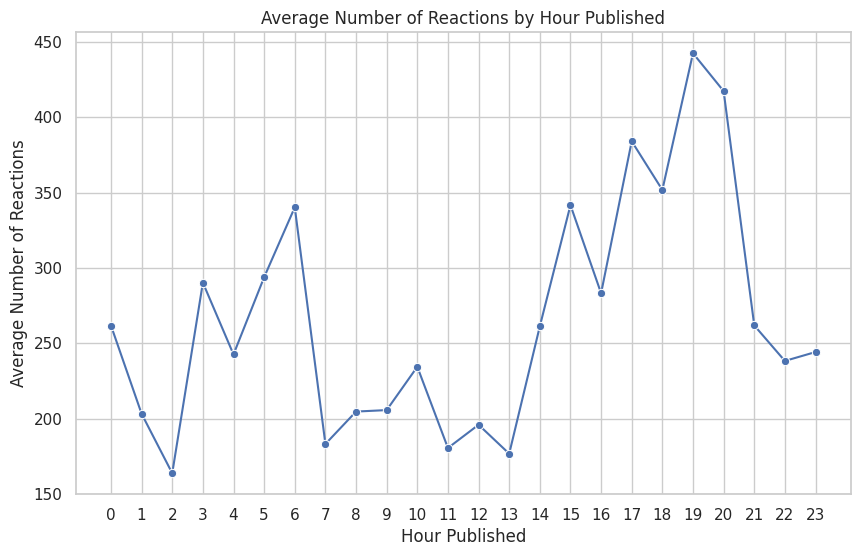

In [106]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='hrs_pub', y='num_reactions', data=hrs_rec, marker='o')
plt.title('Average Number of Reactions by Hour Published')
plt.xlabel('Hour Published')
plt.ylabel('Average Number of Reactions')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<ipython-input-107-b30bdc2231a1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_pub', y='num_reactions', data=day_rec, palette='viridis')


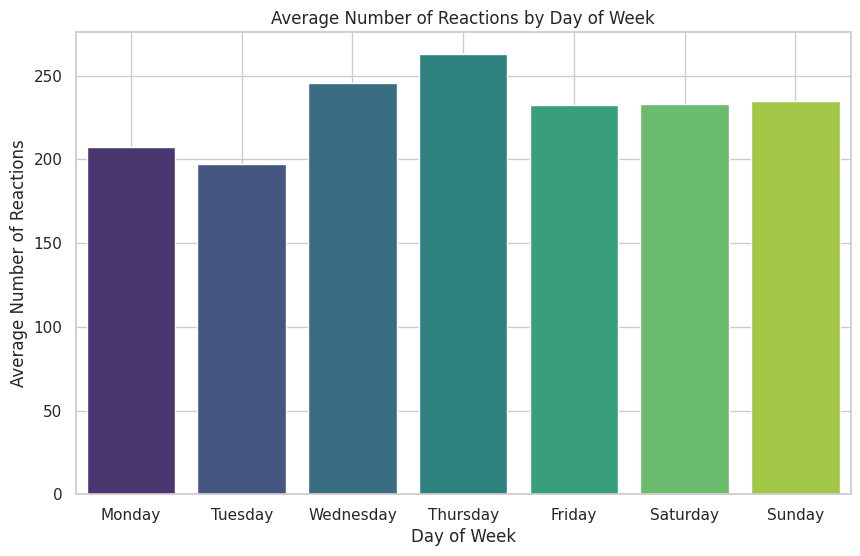

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_pub', y='num_reactions', data=day_rec, palette='viridis')
plt.title('Average Number of Reactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Reactions')
plt.xticks(range(0, 7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

<ipython-input-108-257607ec44ef>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='month_pub', y='num_reactions', data=month_rec, marker='o', palette='viridis')


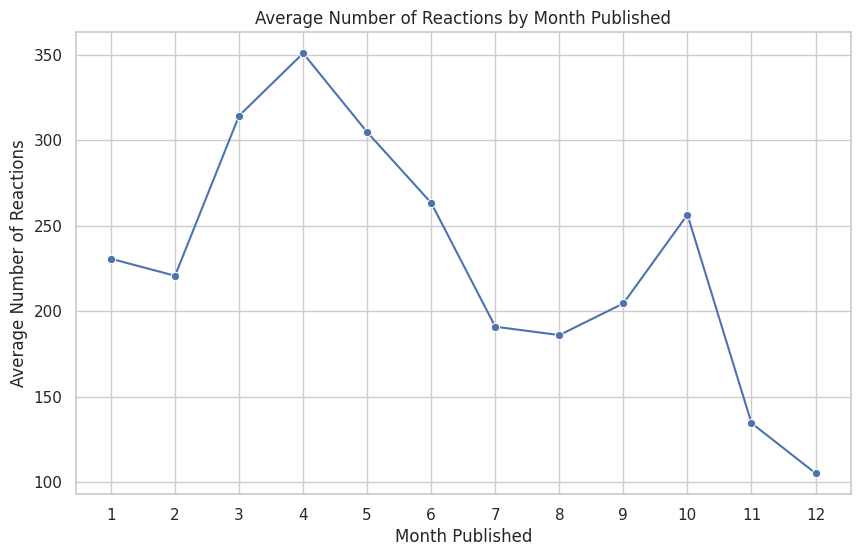

In [108]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='month_pub', y='num_reactions', data=month_rec, marker='o', palette='viridis')
plt.title('Average Number of Reactions by Month Published')
plt.xlabel('Month Published')
plt.ylabel('Average Number of Reactions')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Questions
2.	Is there a correlation between the number of reactions (num_reactions) and other engagement

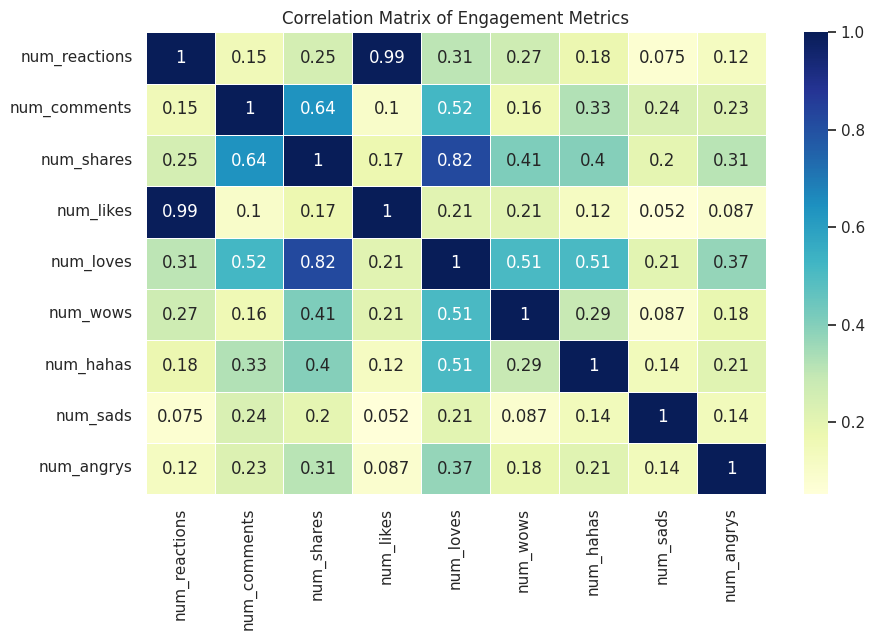

In [109]:
eng_mtx = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
crr = df[eng_mtx].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(crr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [88]:
print(df.columns)

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'status_type_encoded', 'hrs_pub',
       'day_pub', 'month_pub'],
      dtype='object')


In [89]:
print(df['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


Seperating the columns for kmeans

In [90]:
cat_clm = df[['status_type']]
num_clm = df[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

Standardizing the columns for kmeans

In [91]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

en = OneHotEncoder(sparse=False, drop='first')
cat_clm_en = en.fit_transform(cat_clm)

sc = StandardScaler()
num_clm_sc = sc.fit_transform(num_clm)

df_cat = pd.DataFrame(cat_clm_en, columns=en.get_feature_names_out())
df_num = pd.DataFrame(num_clm_sc, columns=num_clm.columns)

dfML = pd.concat([df_cat, df_num], axis=1)
print(dfML.head())

   status_type_photo  status_type_status  status_type_video  num_reactions  \
0                0.0                 0.0                1.0       0.646104   
1                1.0                 0.0                0.0      -0.173192   
2                0.0                 0.0                1.0      -0.006738   
3                1.0                 0.0                0.0      -0.257499   
4                1.0                 0.0                0.0      -0.037003   

   num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  \
0      0.323350    1.686879   0.482727   1.983266  0.196196   0.076713   
1     -0.252206   -0.304144  -0.144720  -0.318454 -0.147879  -0.176010   
2      0.013089    0.129017  -0.024571   0.206938 -0.033187   0.076713   
3     -0.252206   -0.304144  -0.231495  -0.318454 -0.147879  -0.176010   
4     -0.252206   -0.304144  -0.024571  -0.093286 -0.147879  -0.176010   

   num_sads  num_angrys  
0  0.473570   -0.155748  
1 -0.152587   -0.155748  
2 -0.152

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [92]:
print(dfML.describe())

       status_type_photo  status_type_status  status_type_video  \
count        7050.000000         7050.000000        7050.000000   
mean            0.608227            0.051773           0.331064   
std             0.488181            0.221584           0.470629   
min             0.000000            0.000000           0.000000   
25%             0.000000            0.000000           0.000000   
50%             1.000000            0.000000           0.000000   
75%             1.000000            0.000000           1.000000   
max             1.000000            1.000000           1.000000   

       num_reactions  num_comments   num_shares     num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7.050000e+03  7050.000000   
mean        0.000000      0.000000     0.000000  1.612579e-17     0.000000   
std         1.000071      1.000071     1.000071  1.000071e+00     1.000071   
min        -0.497451     -0.252206    -0.304144 -4.784685e-01    -0.318454   
25%   

Selecting the k value

In [93]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(dfML)
    wcss.append(kmeans.inertia_)

print(wcss)

[67037.32269503568, 51672.508201546545, 41749.363499563, 35734.602744104675, 31870.779211782396, 28126.718680030557, 25295.373412635316, 22043.737240595412, 19964.461097196956, 18335.418145371666]


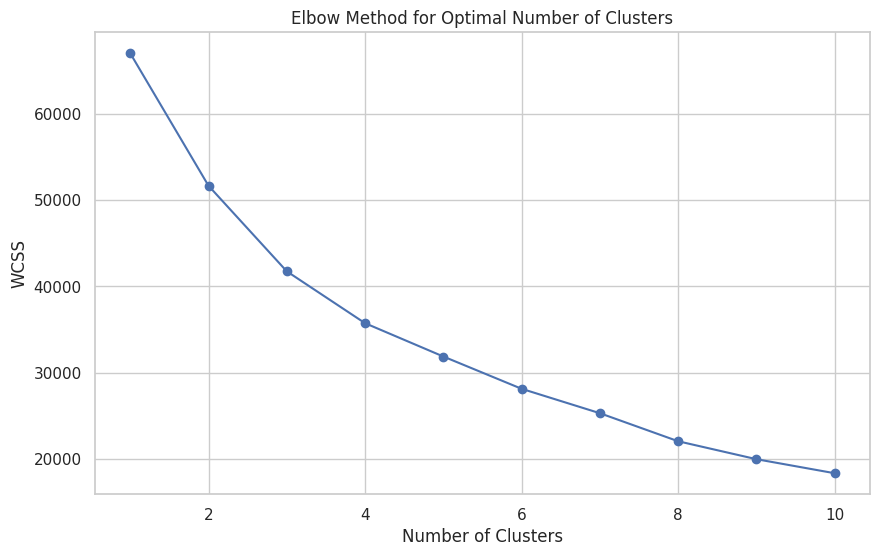

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [95]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
km.fit(dfML)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [96]:
cls = km.predict(dfML)
dfML['cluster'] = cls
print(dfML.head())

   status_type_photo  status_type_status  status_type_video  num_reactions  \
0                0.0                 0.0                1.0       0.646104   
1                1.0                 0.0                0.0      -0.173192   
2                0.0                 0.0                1.0      -0.006738   
3                1.0                 0.0                0.0      -0.257499   
4                1.0                 0.0                0.0      -0.037003   

   num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  \
0      0.323350    1.686879   0.482727   1.983266  0.196196   0.076713   
1     -0.252206   -0.304144  -0.144720  -0.318454 -0.147879  -0.176010   
2      0.013089    0.129017  -0.024571   0.206938 -0.033187   0.076713   
3     -0.252206   -0.304144  -0.231495  -0.318454 -0.147879  -0.176010   
4     -0.252206   -0.304144  -0.024571  -0.093286 -0.147879  -0.176010   

   num_sads  num_angrys  cluster  
0  0.473570   -0.155748        3  
1 -0.152587   -0

In [97]:
print(dfML['cluster'].value_counts())

cluster
0    6180
3     444
2     392
1      34
Name: count, dtype: int64


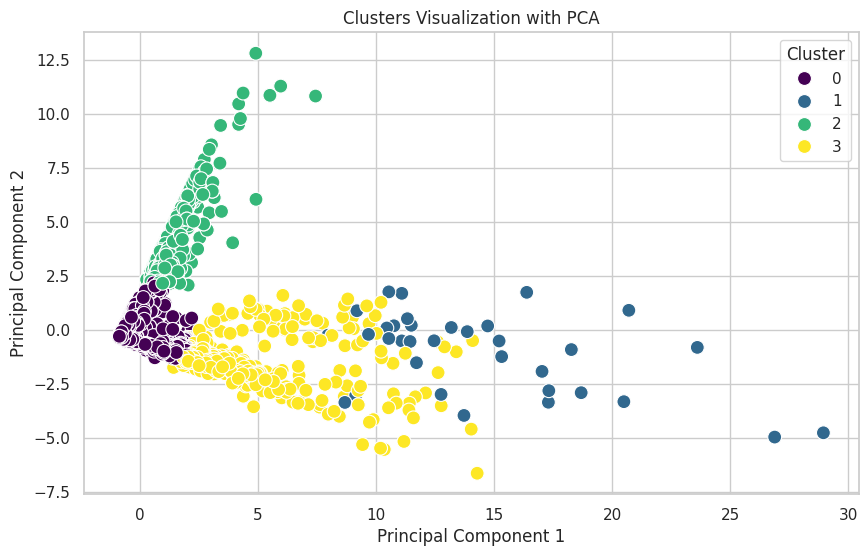

In [98]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(dfML.drop('cluster', axis=1))

pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = dfML['cluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=100, data=pca_df)
plt.title('Clusters Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


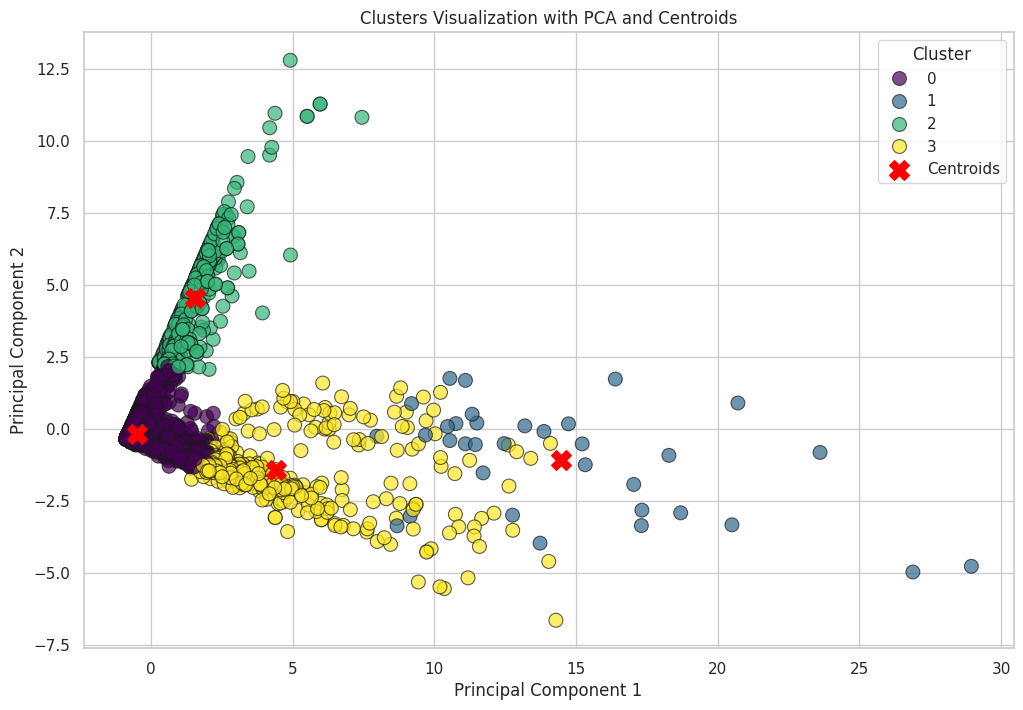

In [99]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dfML.drop('cluster', axis=1))

# Create a DataFrame for the PCA components and add the cluster labels
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = dfML['cluster']

# Fit K-Means on the scaled data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dfML.drop('cluster', axis=1))

# Transform cluster centers to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Create a DataFrame for the centroids
centroids_df = pd.DataFrame(centroids_pca, columns=['PCA1', 'PCA2'])
centroids_df['cluster'] = range(4)  # Adjust the range based on the number of clusters

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', palette='viridis', data=pca_df, s=100, alpha=0.7, edgecolor='k')

# Add centroids to the plot
plt.scatter(centroids_df['PCA1'], centroids_df['PCA2'], c='red', s=200, marker='X', label='Centroids')

plt.title('Clusters Visualization with PCA and Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


5. What is the count of different types of posts in the dataset?

In [100]:
print(df['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


<ipython-input-101-8494e371382c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status_type', data=df, palette='viridis')


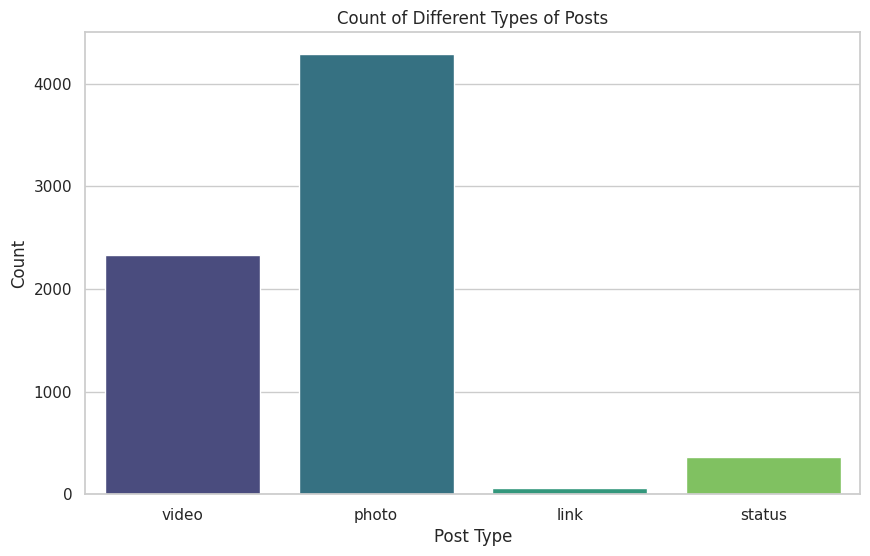

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='status_type', data=df, palette='viridis')
plt.title('Count of Different Types of Posts')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()

6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

In [102]:
avg = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(avg)

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


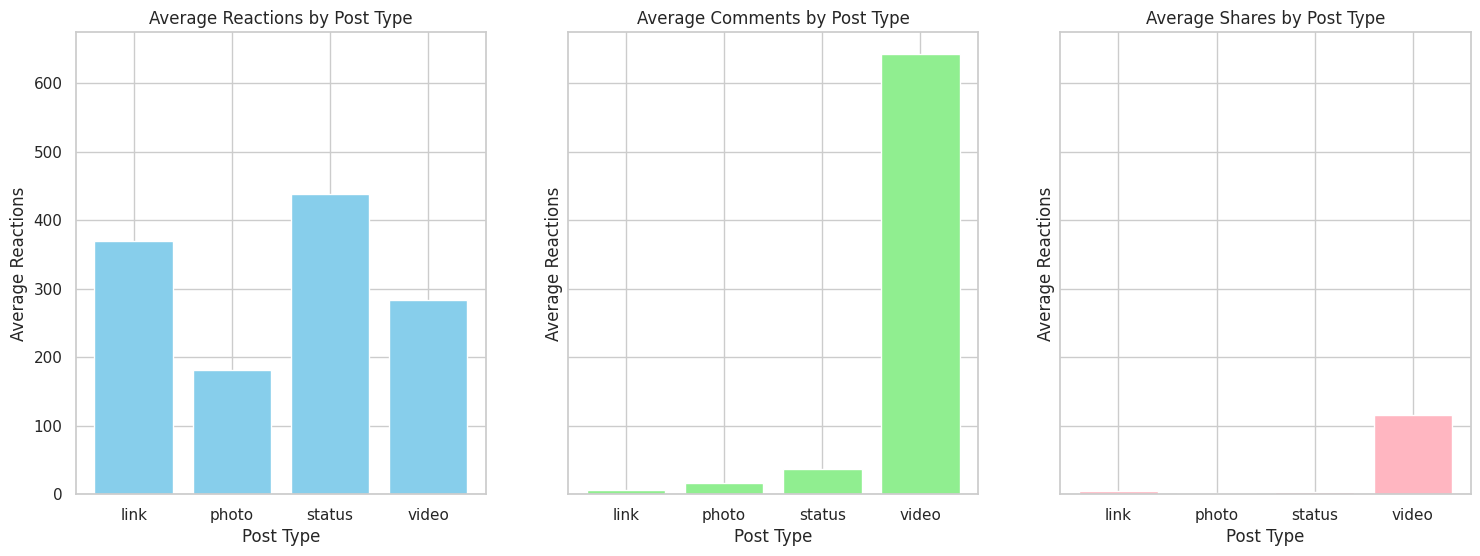

In [103]:
post_types = avg.index
num_rec = avg['num_reactions'].values
num_cmt = avg['num_comments'].values
num_shr = avg['num_shares'].values

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
ax[0].bar(post_types, num_rec,color = 'skyblue')
ax[0].set_title('Average Reactions by Post Type')
ax[0].set_xlabel('Post Type')
ax[0].set_ylabel('Average Reactions')

ax[1].bar(post_types, num_cmt,color = 'lightgreen')
ax[1].set_title('Average Comments by Post Type')
ax[1].set_xlabel('Post Type')
ax[1].set_ylabel('Average Reactions')

ax[2].bar(post_types, num_shr,color = 'lightpink')
ax[2].set_title('Average Shares by Post Type')
ax[2].set_xlabel('Post Type')
ax[2].set_ylabel('Average Reactions')
plt.show()